In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
#import imblearn

from scipy import stats

from graphviz import Source
from sklearn import tree
from IPython.display import Image

red_wine = pd.read_csv('winequality-red.csv', sep = ';')
white_wine = pd.read_csv('winequality-white.csv', sep = ';')

# create a new variable 'wine_type'
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'


# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

wines = pd.concat([red_wine, white_wine])

ModuleNotFoundError: No module named 'graphviz'

In [4]:
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)

print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'medium': 2706, 'low': 1693, 'high': 148}) Counter({'medium': 1209, 'low': 691, 'high': 50})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [5]:
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [6]:
# train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))


              precision    recall  f1-score   support

         low       0.26      0.36      0.30        50
      medium       0.67      0.67      0.67       691
        high       0.79      0.78      0.79      1209

    accuracy                           0.73      1950
   macro avg       0.58      0.60      0.59      1950
weighted avg       0.74      0.73      0.73      1950



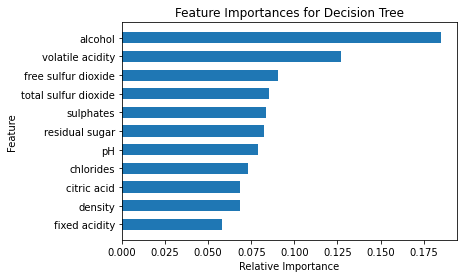

In [7]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')